# 1. [30 pts] Examine the movie reviews with your favorite approach (such as DataFrame, small analytical scripts, visual observation of the file, etc.) and pick one movie title that shows several times in the reviews (such as Jurassic Park, Star Wars, James Bond, etc.). Conduct some Python scripted analysis and find out how many reviews are related to the movie title you picked. List your findings and comment.

In [1]:
import csv
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation
from nltk import word_tokenize
import re
from numpy.linalg import norm

In [2]:
%%time
reviews_sentiment=[]
with open('../movie_data.csv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f, delimiter=',', quotechar='"')
    next(reader)  # skip header
    lines = []
    for line in reader:
        reviews_sentiment.append(line[0])
        #reviews_sentiment_w_sent.append(line)

CPU times: total: 3.45 s
Wall time: 4.17 s


In [3]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

# Combination of stop words and punctuations
Stop_words = set(stopwords.words('english')+ ['br','``'])

# Drop digits for this example
def tokenize(text):
    terms = word_tokenize(text)
    # all lower case
    terms = [w.lower() for w in terms]
    # filter stop words
    terms = [w for w in terms if w not in Stop_words and not w.isdigit()]
    terms = [w for w in terms if len(w) > 3]
    # remove contractions, best way might be having a list 
    terms = [w for w in terms if not re.search(r'^\W\w+$', w)]
    return terms

In [4]:
pos_id =['Scream','Wes Craven','Neve Campbell','Courteney Cox']

scream_interest_reviews = []

for review in reviews_sentiment:
    for keyword in pos_id:
        if keyword in review:
            scream_interest_reviews.append(review)
            break

In [5]:
scream_review_tokens=[tokenize(review) for review in scream_interest_reviews]

In [6]:
%%time
review_tokens=[tokenize(review) for review in reviews_sentiment]

CPU times: total: 2min 36s
Wall time: 3min 45s


<FreqDist with 152768 samples and 5326502 outcomes> 



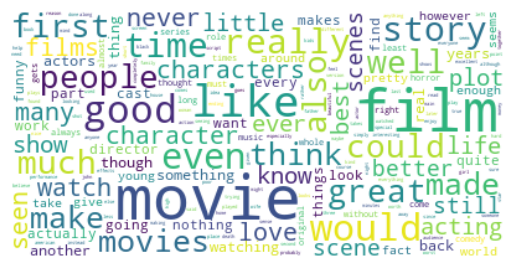

In [7]:
import operator

freq_dis_review= {}  # key-value pair
for review in review_tokens:
    for tok in review:
        if tok in freq_dis_review:
            freq_dis_review[tok] += 1
        else:
            freq_dis_review[tok] = 1


Freq_dist_nltk = nltk.FreqDist(freq_dis_review)
print(Freq_dist_nltk, '\n')

import wordcloud as wc
import matplotlib.pyplot as plt


wordcloud = wc.WordCloud(max_font_size=50, background_color="white").fit_words(Freq_dist_nltk)

plt.imshow(wordcloud, interpolation="bilinear"); plt.axis("off"); plt.show()

<FreqDist with 10327 samples and 45296 outcomes> 



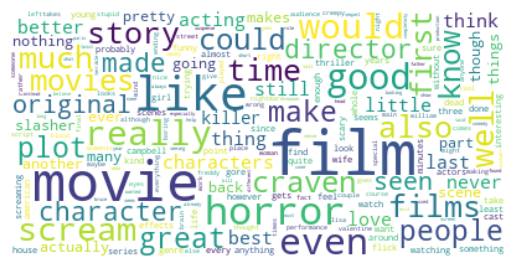

In [8]:
import operator

freq_dis= {}  # key-value pair
for review in scream_review_tokens:
    for tok in review:
        if tok in freq_dis:
            freq_dis[tok] += 1
        else:
            freq_dis[tok] = 1

Freq_dist_nltk_scream = nltk.FreqDist(freq_dis)
print(Freq_dist_nltk_scream, '\n')

import wordcloud as wc
import matplotlib.pyplot as plt

wordcloud = wc.WordCloud(max_font_size=50, background_color="white").fit_words(Freq_dist_nltk_scream)

plt.imshow(wordcloud, interpolation="bilinear"); plt.axis("off"); plt.show()

In [10]:
formatted_percentage = "{:.2f}%".format(((len(scream_interest_reviews)/len(reviews_sentiment))* 100))
formatted_percentage

'0.56%'

Around roughly ".56%" of the movies listed are related in some way to the "Scream" movie franchise. Due to the common use of the word, "Scream", it can be challenging to figure out if the title is related to the movie franchise or not, since the word is used in common practice. Of course, it is certainly a lot easier now to tokenzie and filter out irrelevant titles since we now are only dealing with 200-300 reviews versus 50,000. 

If we look at the two word clouds, we can see some similarities, where common words like film and movie are commonly used. Still, we can see that there are some dissimilarities as well, where words like horror,killer, scary, and slasher are commonly used in the scream tokens, and not in the general pool of reviews. 

# 2. [70 pts] Use google search to find 3 web pages related to the picked title, download it to your pipeline for parsing, preferably every step scripted as opposed to manual. Use some similarity metrics to compare to list 10 reviews that are most similar to the 3 web pages you found out. This comparison can be tabular, such as 3 web pages compared to the 10 top reviews. Comment on your results. (Hint: You can use TfidfVectorizer to extract a vocabulary from your corpus)

In [11]:
import googlesearch as gs

# Set our search text
query_text = "Scream -png -sassymama"  # remove png or images that can throw off decoding of the web page
gs_generator = gs.search(query=query_text, tld='com', lang='en', safe='on', num=30, stop=30)

In [12]:
import ssl
from urllib.request import urlopen
from bs4 import BeautifulSoup

# WebPage_ID1 for the first page
WebPage_ID1 = 0
WebPage_ID2 = 4
WebPage_ID3 = 21

context = ssl._create_unverified_context()




# These three webpages seemed to be the most reliable, which is why I chose to use them. Sometimes they appear
# differently in the search results and therefore were then coded in
html1 = urlopen('https://en.wikipedia.org/wiki/Scream_(1996_film)', context=context).read().decode('utf-8')
html2 = urlopen('https://en.wikipedia.org/wiki/Scream_(2022_film)', context=context).read().decode('utf-8')
html3 = urlopen('https://www.paramountplus.com/movies/video/P1DZtBQ4PfwSJVpEzYDlcu83ulIk_ARL/', context=context).read().decode('utf-8')

rawtext1 = BeautifulSoup(html1, 'html.parser').get_text()
rawtext2 = BeautifulSoup(html2, 'html.parser').get_text()
rawtext3 = BeautifulSoup(html3, 'html.parser').get_text()
print('Length of the Web page (as a string) 1 =', len(rawtext1))
print('Length of the Web page (as a string) 2 =', len(rawtext2))
print('Length of the Web page (as a string) 3 =', len(rawtext3))

Length of the Web page (as a string) 1 = 117273
Length of the Web page (as a string) 2 = 55168
Length of the Web page (as a string) 3 = 3749


In [13]:
# Borrowed from the previous work
from string import punctuation
from nltk.corpus import stopwords
import re  # we will remove some contractions with regular expression

# Combination of stop words and punctuations
Stop_words = stopwords.words('english') + list(punctuation) + ['br']

# Drop digits for this example
def mytokenizer(_text):
    terms = nltk.word_tokenize(_text)
    # all lower case
    terms = [w.lower() for w in terms]
    # filter stop words
    terms = [w for w in terms if w not in Stop_words and not w.isdigit()]
    # remove contractions, best way might be having a list of tokens to be filtered
    terms = [w for w in terms if not re.search(r'^(\W\w+|[\`\'\"]+)$', w)]
    return terms

In [14]:
def costeta(_a, _b):
    if(norm(_a) == 0 or norm(_b) == 0):
        return 0
    return np.dot(_a, _b) / (norm(_a)*norm(_b))

In [15]:
# Check the number of sentences
sentences1 = nltk.sent_tokenize(rawtext1)
sentences2 = nltk.sent_tokenize(rawtext2)
sentences3 = nltk.sent_tokenize(rawtext3)
bing_sent=sentences1+sentences2+sentences3
len(bing_sent)

2412

In [16]:
import numpy as np
import nltk
import re

# Assuming you have defined Stop_words and costeta elsewhere

def mytokenizer(_text):
    terms = nltk.word_tokenize(_text)
    # All lowercase
    terms = [w.lower() for w in terms]
    # Filter stop words
    terms = [w for w in terms if w not in Stop_words and not w.isdigit()]
    # Remove contractions and certain symbols
    terms = [w for w in terms if not re.search(r'^(\W\w+|[\`\'\"]+)$', w)]
    return terms

def get_similarity(sentences1, sentences2_tokens):
    # Combine all sentences1 to tokenize and build the vocabulary
    Vocabulary_all=set([term for sent in sentences1 for term in mytokenizer(sent)])
    for sent_tokens in sentences2_tokens:
        Vocabulary_all.update(sent_tokens)

    # Create a vocabulary index
    Vocabulary = list(Vocabulary_all)
    Vocabulary_index = {term: i for i, term in enumerate(Vocabulary)}

    M = len(Vocabulary_index)

    # Vectorize the build_vector function
    def build_vector(_words):
        v = np.zeros((M), dtype=np.float32)
        indices = [Vocabulary_index[w] for w in _words if w in Vocabulary_index]
        v[indices] = 1
        return v

    # Vectorize tokenization and similarity calculation
    text1_tokens = [mytokenizer(sent) for sent in sentences1]

    text1_v = build_vector([term for tokens in text1_tokens for term in tokens])

    costetas = []
    for sent_tokens in sentences2_tokens:
        text2_sent_v = build_vector(sent_tokens)
        costetas.append(costeta(text1_v, text2_sent_v))


    return np.mean(costetas)

l = []
sentences2_tokens = [mytokenizer(sent) for sent in bing_sent]
                              
for review in scream_review_tokens:
    l.append([review, get_similarity(review, sentences2_tokens)])

In [17]:
sorted_list = sorted(l, key=lambda x: x[1],reverse=True)
for x in range(5):
    print(sorted_list[x],"\n")

[['would', 'like', 'absolutely', 'loved', 'campfire', 'tales', 'original', 'horror', 'flicks', 'twisted', 'ending', 'contents', 'movie', 'scary', 'weird', 'enough', 'ending', 'awesome', 'movie', 'happy', 'released', 'august', '30th.i', 'hesitate', 'copy', 'day.i', 'think', 'movie', 'received', 'credit', 'recognition', 'movies', 'came', 'shortly', 'acknowledge', 'brother', 'telling', 'movie', 'would', 'known', 'stinks', 'opinion', 'better', 'scream', 'know', 'last', 'summer', 'horror', 'time', 'hope', 'able', 'movie', 'least', 'able', 'difference', 'loved', 'horror', 'movie', 'junkie', 'campfire', 'tales', 'like', 'dessert'], 0.02998610091423477] 

[['personally', 'enjoyed', 'thouroughly', 'first', 'time', 'seen', 'theatrically', 'release', 'australian', 'slasher', 'flick', 'genre', 'normally', 'restricted', 'mainstream', 'hollywood', 'films.', 'usual', 'cooky', 'comedies', 'dramas', 'coming', 'australia', 'loved', 'able', 'homegrown', 'horror', 'movie', 'anything', 'even', 'think', 're

In [18]:
sorted_list[-1]

[['brian',
  'hell',
  'signed',
  'recently',
  'festival',
  'greeted',
  'howling',
  'laughter',
  'throughout',
  'time',
  'credits',
  'rolled',
  'tears',
  'streaming',
  'faces',
  'many',
  'audience',
  'plot',
  'clunky',
  'melding',
  'x-files',
  'cynically',
  'aimed',
  'audience',
  'possible',
  'without',
  'sued',
  'sequences',
  'involving',
  'abductions',
  'hilarious-',
  'yuzna',
  'staging',
  'george',
  'pathetic',
  'plastic',
  'aliens',
  'drew',
  'gales',
  'disbelieving',
  'derisive',
  'laughter',
  'limp',
  'camp',
  'stupid',
  'hope',
  'aberration-',
  'awful',
  'living',
  'dead',
  'good.',
  'steev'],
 0.002517790865665842]

Upon careful examination of the diverse range of reviews available, it becomes evident that a significant portion of the top-rated reviews do not pertain to any movie in the "Scream" franchise. Nonetheless, it can be deduced that the majority of these reviews are firmly entrenched within the horror genre. Specifically, three of the most similar  reviews are associated with the films "Campfire Tales," "Valentine," and "The Haunting." Remarkably, even the review with the lowest similarity score in this list is still part of the genre.

This phenomenon can be attributed, in part, to the frequent mention of "Scream" in reviews dedicated to the horror genre. This is primarily because "Scream" holds a distinguished status as a fundamental classic and serves as a common point of reference when evaluating other films in the same genre. This pattern is further amplified by the use of "Scream" as a verb, signifying a recognition of its influence on the genre.

Considering these two prominent factors, it is reasonable to speculate that a substantial number of extraneous reviews have found their way into our analysis, potentially diluting its relevance.